# Final Project: Predictors for Broadway Show Income
#### Group 6 Fantastic- Alexander Adney, Sharon Kim, Dominic Peters, Jessica Urias
#### SDS 322E Fall 2024

## Introduction

In this project, the Broadway dataset captures a detailed account of Broadway shows, including their performance statistics, attendance, and revenue data. With over 31,296 rows and 12 variables, it provides a comprehensive look at the factors influencing Broadway revenue. 

Broadway shows are a cornerstone of the entertainment industry, drawing millions of attendees annually. However, their financial success is influenced by various factors such as audience engagement, theater capacity, and the type of show being performed (e.g., musicals vs. plays). Understanding the drivers of gross revenue can provide valuable insights for theater owners, producers, and marketers.

This project aims to answer the following predictive question:
"What factors most influence the gross revenue of Broadway shows, and how accurately can we predict it?"
Predicting gross revenue helps stakeholders identify the critical factors behind a show’s financial success. These insights could guide strategic decisions on scheduling, budgeting, and marketing to maximize profitability.

## Data Preparation

### 1. Data Inspection and Cleaning
Initial inspection showed that the dataset contained no missing or invalid values. There were no duplicate rows either.

In [2]:
import pandas as pd

# Define the URL of the dataset
url = 'https://corgis-edu.github.io/corgis/datasets/csv/broadway/broadway.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(url)

# Display the first few rows of the DataFrame
data.head()

# Get the data types and check for inconsistencies
print(data.info())

# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Summary statistics for numeric variables
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31296 entries, 0 to 31295
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date.Day                    31296 non-null  int64 
 1   Date.Full                   31296 non-null  object
 2   Date.Month                  31296 non-null  int64 
 3   Date.Year                   31296 non-null  int64 
 4   Show.Name                   31296 non-null  object
 5   Show.Theatre                31296 non-null  object
 6   Show.Type                   31296 non-null  object
 7   Statistics.Attendance       31296 non-null  int64 
 8   Statistics.Capacity         31296 non-null  int64 
 9   Statistics.Gross            31296 non-null  int64 
 10  Statistics.Gross Potential  31296 non-null  int64 
 11  Statistics.Performances     31296 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.9+ MB
None
Number of duplicate rows: 0
           Date.Day    D

### 2. Separating outcome and features

Our outcome is going to be Statistics.Gross, since we are trying to predict the gross revenue. Our features, as listed below, are going to provide input data to our model to make predictions.

In [ ]:
# Features (predictors)
X = data[['Statistics.Attendance', 'Statistics.Capacity', 'Date.Year']]

# Outcome (target variable)
y = data['Statistics.Gross']

### 3. Splitting into train and test

The cleaned and enriched dataset was split into training (80%) and test (20%) sets. Predictors included variables such as Statistics.Attendance, Statistics.Capacity, and Date.Year while the target variable was Statistics.Gross.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Validation

#### Overview

To predict gross revenue (Statistics.Gross), three models were trained using the same predictors (Statistics.Attendance, Statistics.Capacity, and Date.Year):

Model 1: Linear Regression - A baseline model to establish a simple, interpretable relationship between the predictors and the target variable.

Model 2: Random Forest Regressor - A non-linear model capable of capturing complex interactions between predictors.

Model 3: Gradient Boosting Regressor - A sequential model designed to improve predictive accuracy by minimizing errors iteratively.

#### Performance Metrics
To evaluate the models, the following metrics were used to predict a numerical outcome:

Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. A lower value indicates better performance.

R² Score: Represents the proportion of variance in the target variable explained by the predictors. Higher values (closer to 1) indicate better performance.

### Model 1: Linear Regression Model with Attendance, Capacity, and Year

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Linear Regression model
lr = LinearRegression()

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_lr = -np.mean(cv_scores_lr)

print("Linear Regression Cross-Validation Results")
print(f"Average CV MSE: {cv_mse_lr}")

# Train and test on full training and test sets
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Test Results")
print(f"MSE: {mse_lr}")
print(f"R²: {r2_lr}")

Linear Regression Cross-Validation Results
Average CV MSE: 30034500653.23417

Linear Regression Test Results
MSE: 29745930999.497845
R²: 0.7937492040346811


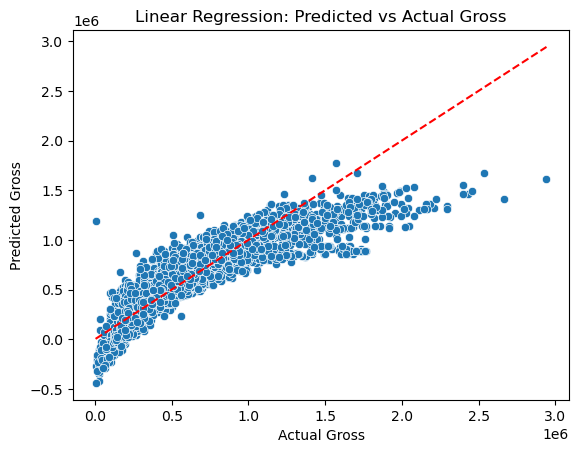

In [ ]:
# Predicted vs Actual for Linear Regression

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual Gross')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
plt.show()

### Model 2: Random Forest Model with Attendance, Capacity, and Year

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100)

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_rf = -np.mean(cv_scores_rf)

print("\nRandom Forest Cross-Validation Results")
print(f"Average CV MSE: {cv_mse_rf}")

# Train and test on full training and test sets
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Test Results")
print(f"MSE: {mse_rf}")
print(f"R²: {r2_rf}")



Random Forest Cross-Validation Results
Average CV MSE: 10426806862.118532

Random Forest Test Results
MSE: 9744409010.44275
R²: 0.9324347214195658


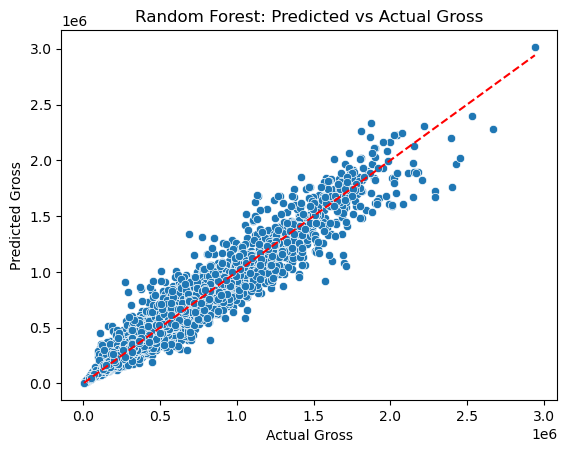

In [ ]:
# Predicted vs Actual for Random Forest

sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Predicted vs Actual Gross')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
plt.show()

### Model 3: Gradient Boosting Model with Attendance, Capacity, and Year

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_gb = -np.mean(cv_scores_gb)

print("\nGradient Boosting Cross-Validation Results")
print(f"Average CV MSE: {cv_mse_gb}")

# Train and test on full training and test sets
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Test Results")
print(f"MSE: {mse_gb}")
print(f"R²: {r2_gb}")



Gradient Boosting Cross-Validation Results
Average CV MSE: 12153905272.228811

Gradient Boosting Test Results
MSE: 11956123076.396357
R²: 0.917099252963113


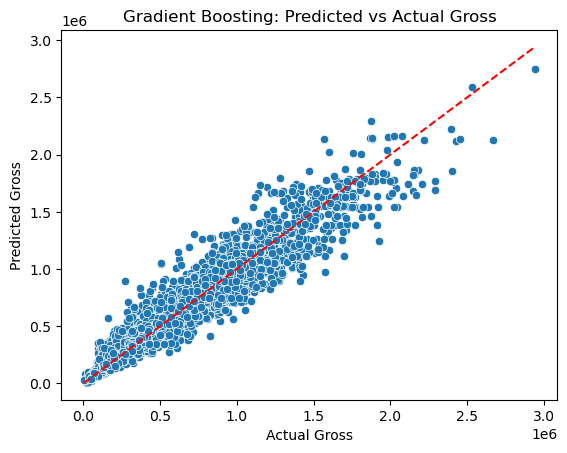

In [ ]:
# Predicted vs Actual for Gradient Boosting

sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Predicted vs Actual Gross')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
plt.show()

## Results and Discussion

#### Comparison of the Model Performance

The Linear Regression model achieved an R² score of 0.79, explaining 79% of the variance in gross revenue. However, its high MSE during both cross-validation (30 billion) and on the test set (29.7 billion) suggests it struggles to fully capture the complexities of the data. This is likely due to its inability to model non-linear relationships. This limitation is visually evident in the Linear Regression Figure: while the predicted gross income values initially cluster around the actual values (dashed line), after the actual gross income exceeds 1.25 million dollars, the predicted values fall significantly short.

The Random Forest model outperformed Linear Regression with a lower cross-validation MSE (10.4 billion), a test set MSE (9.74 billion), and a higher R² (0.93). This indicates its ability to model non-linear relationships and interactions between attendance and capacity, making it more accurate for predicting gross revenue. We see this in the Random Forest Figure, where the predicted values follow the slope of the actual values, unlike the Linear Regression model, where the predicted values stayed consistent after 1.25 million dollars of actual gross income. The close alignment of cross-validation and test results also highlights the reliability of the Random Forest model.

Lastly, the Gradient Boosting model performed comparably to Random Forest, with a cross-validation MSE of 12.2 billion, a test set MSE of 12.0 billion, and an R² of 0.92. While its performance was slightly lower, it demonstrates the robustness of the predictors (attendance, capacity, and year). When we compare the Gradient Boosting Model Figure with the Random Forest Model Figure, we see that they are quite similar, but the Random Forest model predicts higher gross income values more accurately. The validation results also support the reliability of Gradient Boosting, showing its ability to generalize well to unseen data.

#### Selection of the Final Model

Based on the results, Random Forest Regressor is selected as the final model due to:

- The lowest MSE, indicating the most accurate predictions.
- The highest R² score, explaining 93% of the variance in gross revenue.
- Its ability to handle non-linear relationships and feature interactions effectively.

#### Final Model Performance on New Data
The Random Forest model predicts gross revenue with an MSE of 9.74 billion, suggesting a relatively small average squared error in predictions.
An R² of 0.93 indicates that attendance, capacity, and year are strong predictors of gross revenue, but external factors (e.g., marketing, pricing, and seasonality) likely account for the remaining variance.

#### Interpretation of Results

The goal was to identify crucial factors that influence gross revenue and predict it accurately. The findings demonstrate that attendance, capacity, and year are the most influential contributors.
The strong performance of the Random Forest model confirms that these variables, combined with non-linear modeling, can explain most of the revenue variance.

The results suggest that maximizing attendance relative to capacity is critical for increasing gross revenue. Additionally, the year variable may reflect broader trends, such as changes in audience behavior, economic conditions, or shifts in production strategies over time. Strategies to improve occupancy rates (e.g., better marketing or dynamic pricing) could directly impact revenue.
Although the predictors are robust, adding additional features (e.g., show type, ticket prices, or number of performances) could further improve the model’s performance and predictive accuracy.

Some limitations I have encountered is that the model does not account for external variables (e.g., pricing strategies, seasonality, or marketing efforts) that may influence gross revenue. Expanding the dataset and incorporating a broader range of predictors could enhance the model's applicability and provide deeper insights into the dynamics of Broadway show revenue.

## Reflection, acknowledgements, and references

#### Reflection

One of the most challenging aspects of this project was choosing the right dataset. The requirements for the dataset, such as the size, number of variables, and specific criteria for predictive modeling made the selection process more demanding. We first chose a different dataset but realized that it was not fit to determine the features and outcome, which led us to spend more time overall finding the appropriate dataset.
Another challenge was deciding which models and predictors to use. With numerous options available, it was important to carefully evaluate the predictors and models that would best suit the purpose of the project, ensuring both interpretability and predictive accuracy.

This project emphasized the importance of data exploration and preparation as critical steps in building effective predictive models. Cleaning and understanding the dataset helped ensure the models could perform accurately.
I also learned how to evaluate and compare models using metrics like MSE and R², and how different models (e.g., Linear Regression, Random Forest, Gradient Boosting) handle predictors and relationships differently.
Lastly, I gained experience in balancing interpretability and accuracy when choosing models, realizing the trade-offs between simplicity and complexity.

#### Acknowledgements
- Alexander Adney: Contributed to dataset selection, validation, and evaluation.
- Sharon Kim: Assisted in all sections, including data preparation, modeling, and evaluation.
- Dominic Peters: Took part in introduction, revision, and generating of models.
- Jessica Urias: Assisted with dataset selection, visualizations, and validation of the models.

Special thanks to Dr. Chen for providing guidance throughout the project.

#### References
Broadway Dataset from CORGIS Datasets Project: https://corgis-edu.github.io/corgis/csv/broadway/